In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [16]:
df = pd.read_csv('D:/data from kaggle to apply data analysis and vsualization methods/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# data exploration

In [17]:
# checking the data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
# Get summary satistics
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [19]:
# checking Missing(Null) values
df.isna().sum().sum()

0

In [33]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
Name: count, dtype: int64

In [21]:
# drop duplicate values
df.drop_duplicates(inplace = True)

In [22]:
df.duplicated().sum()

0

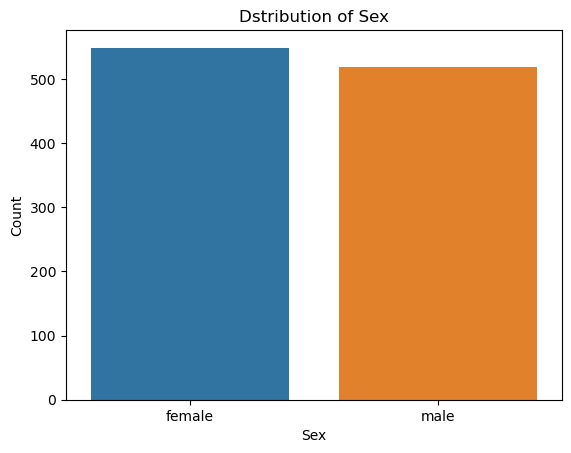

In [43]:
sns.countplot(x = 'sex' , data = df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Dstribution of Sex')
plt.show()

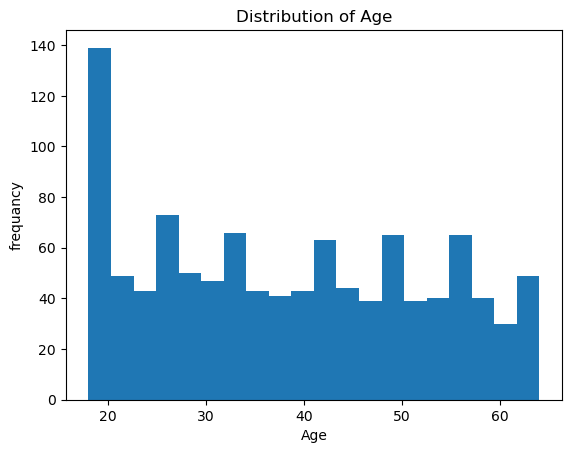

In [44]:
df_cleaned['age'].plot(kind = 'hist' , bins = 20)
plt.xlabel('Age')
plt.ylabel('frequancy')
plt.title('Distribution of Age')
plt.show()

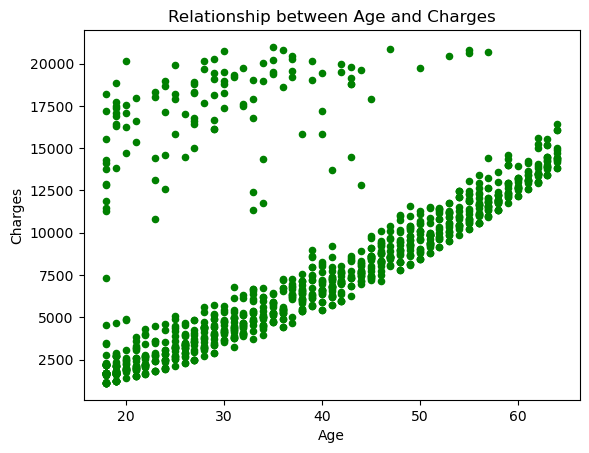

In [56]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()


There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

# data preprocessing

#### manipulate categorical coluns

In [45]:
df_encoded = pd.get_dummies(df_cleaned , columns = ['region'] , prefix = 'region' , dtype = 'int')
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
305,29,male,33.345,2,no,19442.3535,0,1,0,0
187,30,female,30.900,3,no,5325.6510,0,0,0,1
144,30,male,28.690,3,yes,20745.9891,0,1,0,0
215,41,female,37.100,2,no,7371.7720,0,0,0,1
864,51,male,25.400,0,no,8782.4690,0,0,0,1


In [49]:
labelencoder = LabelEncoder()
df_encoded['smoker_encoded'] = labelencoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
228,41,female,31.635,1,no,7358.17565,1,0,0,0,0
1216,40,male,25.080,0,no,5415.66120,0,0,1,0,0
1182,25,female,30.300,0,no,2632.99200,0,0,0,1,0
991,38,female,27.835,2,no,7144.86265,1,0,0,0,0
397,21,male,31.020,0,no,16586.49771,0,0,1,0,0


In [50]:
df_encoded['Sex_encoded'] = labelencoder.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,Sex_encoded
1179,31,male,29.810,0,yes,19350.36890,0,0,1,0,1,1
465,30,female,28.380,1,yes,19521.96820,0,0,1,0,1,0
1026,19,male,26.030,1,yes,16450.89470,0,1,0,0,1,1
318,44,female,27.645,0,no,7421.19455,0,1,0,0,0,0
1099,25,female,33.990,1,no,3227.12110,0,0,1,0,0,0


In [51]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,Sex_encoded
634,51,39.700,1,9391.34600,0,0,0,1,0,1
196,39,32.800,0,5649.71500,0,0,0,1,0,0
1320,31,31.065,3,5425.02335,0,1,0,0,0,1
1150,18,30.305,0,2203.73595,1,0,0,0,0,0
835,42,35.970,2,7160.33030,0,0,1,0,0,1


#### checking outlier and remove it

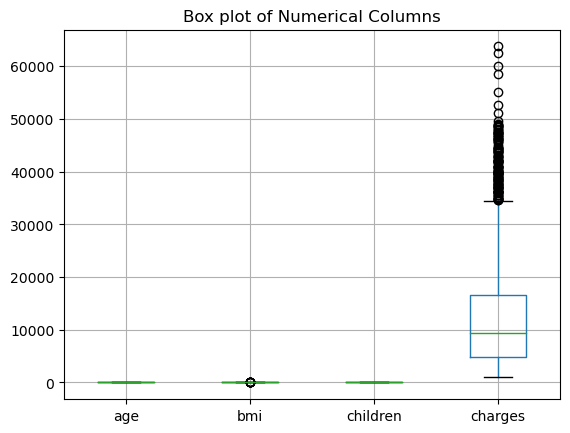

In [52]:
# checking outlier by using box plot for numerical columns
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [53]:
# Handling  Outlier
# Remove Outlier based on specific threshold
df_cleaned = df[ (df['charges'] < 21000 ) & (df['bmi'] < 46) ]

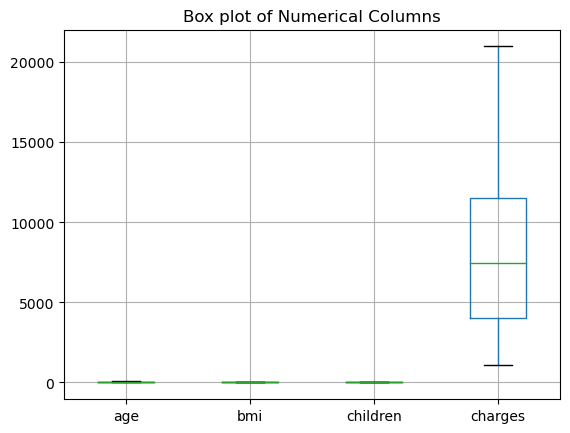

In [54]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

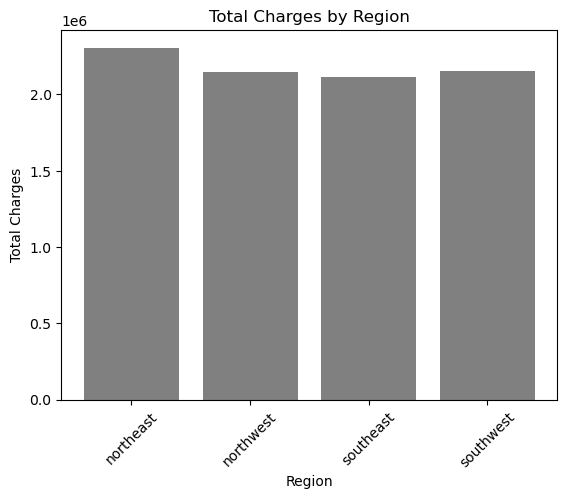

In [55]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Modeling

In [62]:
x = df_encoded.drop(['charges'] , axis = 1)
y = df_encoded['charges']

In [65]:
def predicted_value(q , w):
    x_train , x_test , y_train , y_test = train_test_split(q , w , test_size = 0.2 , random_state = 42
                                                        , shuffle = True)
    lr_model = LinearRegression() 
    lr_model.fit(x_train , y_train)
    y_pred = lr_model.predict(x_test)
    a =  mean_absolute_error(y_test , y_pred)
    b =  mean_squared_error(y_test , y_pred)
    c =  np.sqrt(mean_squared_error(y_test , y_pred))
    return y_pred , a ,  b, c
    
q = x
w = y
predicted_value(q , w) 

(array([ 2881.04562781, 10074.54388795, 10725.83278474,  9363.89724408,
         6325.63175205,  9608.32685644, 11722.3197169 ,  9456.11532781,
        12101.42639317, 11373.17863477,  2290.47600323, 16353.97189289,
        11622.90852709, 12517.11934736, 16565.05053688, 18348.73174831,
         2288.4830371 ,  4463.85739091, 11611.59248206, 11200.96116804,
         5913.09003382,  5116.74131118, 10745.42725196,  5898.14272071,
         2348.5513893 , 11911.30745086,  5248.78227389, 14780.76347276,
         4989.76063679,  1960.07768706, 11700.23065141, 12307.12749771,
        10920.57225224, 10361.15644332,  9333.48548313,  2868.32567865,
         7210.97321297,  8326.46592803,  2122.24161456,  6945.88989445,
         6374.32394603,  6466.53664777,  1679.44570917,  7035.18715426,
         2711.65197451,  7854.39907822,  9679.79919756,  1620.82396539,
        10168.43634978,  6802.93203398,  5210.73765298,  5814.24309047,
        13152.1803045 ,  8717.628081  ,  9473.1858746 ,  1622.12